In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
from sklearn.model_selection import train_test_split
from keras.datasets import mnist

In [18]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

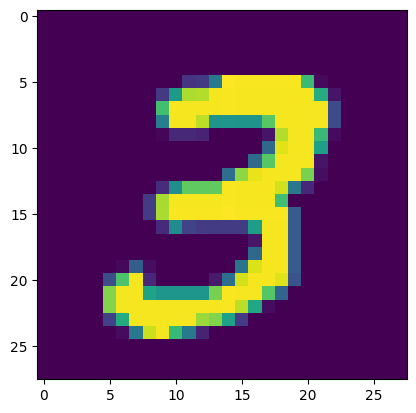

In [22]:
plt.imshow(x_train[7])

In [25]:
x_train.shape

(60000, 28, 28)

In [26]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [27]:
#scaling the data
x_train_scaled = x_train/255
x_test_scaled = x_test/255

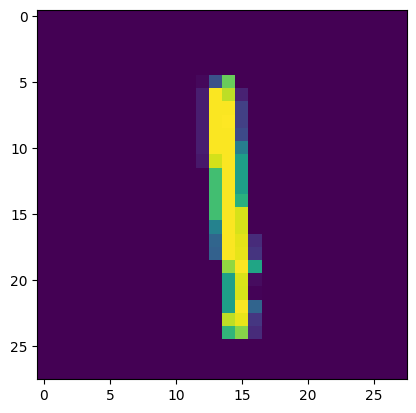

In [33]:
plt.imshow(x_train_scaled[8])

In [46]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(25,activation='relu'),
    keras.layers.Dense(25,activation='relu'),
    keras.layers.Dense(25,activation='relu'),
    keras.layers.Dense(25,activation='relu'),
    keras.layers.Dense(25,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [47]:
model_with_overfitting_adjust = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(25,activation='relu'),
    keras.layers.Dense(25,activation='relu',kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(25,activation='relu',kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(25,activation='relu',kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(25,activation='relu',kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    keras.layers.Dense(10,activation='sigmoid')
])

c:\Users\YCS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [59]:
earlystopping = keras.callbacks.EarlyStopping(
    monitor="accuracy",
    min_delta=0.5,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [52]:
model_with_overfitting_adjust.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [60]:
history_over = model_with_overfitting_adjust.fit(x_train_scaled,y_train,callbacks=[earlystopping],epochs=50)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9624 - loss: 0.1699
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9617 - loss: 0.1742
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9613 - loss: 0.1734
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9621 - loss: 0.1727
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9614 - loss: 0.1719
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9612 - loss: 0.1722
Epoch 6: early stopping


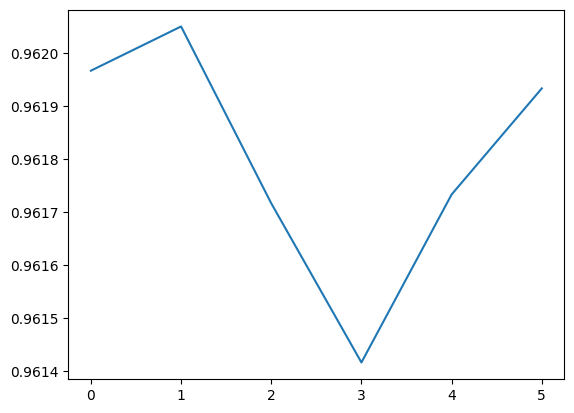

In [61]:
plt.plot(history_over.history['accuracy'])

In [54]:
loss_over,acc_over = model_with_overfitting_adjust.evaluate(x_test_scaled,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9534 - loss: 0.2256


In [55]:
acc_over

0.9593999981880188

In [37]:
#compilibg the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [39]:
history = model.fit(x_train_scaled,y_train,epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9844 - loss: 0.0468
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9867 - loss: 0.0429
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9864 - loss: 0.0425
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9882 - loss: 0.0362
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9878 - loss: 0.0386
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9883 - loss: 0.0366
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9874 - loss: 0.0379
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9871 - loss: 0.0370
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9887 - loss: 0.0341
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9899 - loss: 0.0317
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9901 - loss: 0.0309
Epoch 12/20
1875/1875 ━━━━━━━━

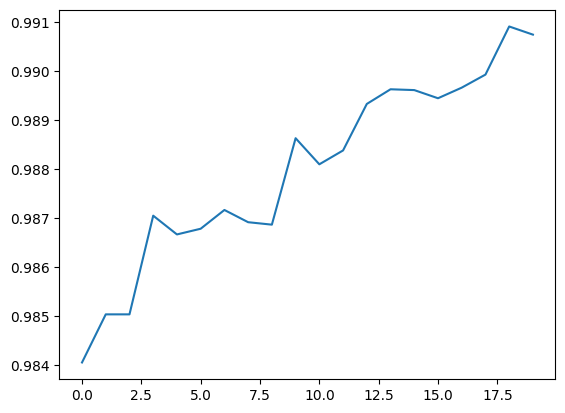

In [40]:
plt.plot(history.history['accuracy'])

In [41]:
loss,acc = model.evaluate(x_test_scaled,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9562 - loss: 0.2253   


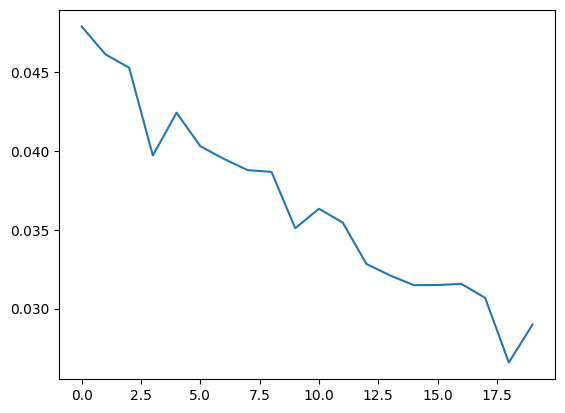

In [43]:
plt.plot(history.history['loss'])